In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil # 파일 복사
import data_prepro_method

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

In [2]:
name_list = ['긴소매',           # 0
            '니트,스웨터',      # 1
            '맨투맨',           # 2
            '민소매',           # 3
            '반소매',           # 4
            '셔츠,블라우스',    # 5
            '후드티',           # 6
            ]

In [3]:
# 데이터 불러오기
csv_path = 'csv/'

df = pd.read_csv(f'{csv_path + name_list[0]}.csv', index_col= 0)
display(df)

df_copy = df.copy()

,#롱슬리브,#긴팔티,#긴팔티셔츠,#티셔츠,#긴팔,#롱슬리브티,#긴소매,#오버핏,#여자긴팔티,#그래픽티셔츠
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,1
2,1,1,1,1,0,0,0,0,0,0
3,1,1,1,0,1,1,0,0,0,0
4,0,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
495,1,1,1,1,0,0,0,1,0,0
496,0,0,0,0,0,0,0,0,0,0
497,1,1,1,1,1,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0


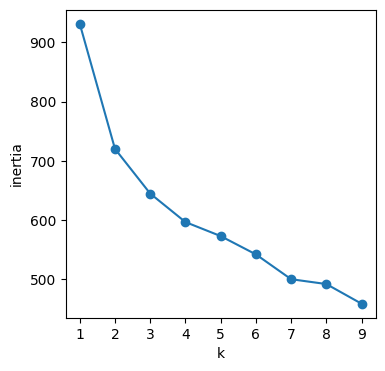

In [4]:
k_range = range(1, 10)
inertias = []

for k in k_range:
    model = KMeans(n_clusters= k)
    model.fit(df_copy)
    inertias.append(model.inertia_)

plt.figure(figsize= (4,4))

plt.plot(k_range, inertias, '-o')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(k_range)
plt.show()

In [5]:
# 군집점 갯수 설정
clust_model = KMeans(n_clusters= 5)
clust_model.fit(df_copy)
centers = clust_model.cluster_centers_

# df에 class 추가
clusted_df = df_copy.copy()
pred = clust_model.predict(df_copy)
clusted_df['class'] = pred

# csv로 저장
clusted_df.to_csv(f'{csv_path}clusted_긴소매.csv')

In [6]:
pd.set_option('display.max_row', 100)
#display(clusted_df.iloc[:100])

In [14]:
index_list = list(clusted_df[clusted_df['class'] == 0].index)
print(index_list)
print(type(index_list))

[20, 27, 28, 30, 35, 39, 42, 50, 64, 66, 76, 84, 100, 106, 110, 113, 118, 125, 127, 128, 130, 132, 135, 141, 143, 144, 153, 156, 157, 164, 168, 172, 175, 179, 180, 183, 184, 191, 192, 195, 211, 218, 221, 225, 235, 236, 240, 249, 252, 253, 255, 270, 285, 287, 290, 292, 297, 301, 308, 314, 320, 322, 325, 328, 330, 334, 342, 343, 344, 347, 349, 362, 363, 372, 374, 375, 378, 380, 383, 388, 393, 396, 402, 405, 410, 412, 415, 422, 428, 431, 433, 435, 437, 445, 452, 454, 459, 467, 469, 471, 472, 477, 478, 479, 483, 491, 492, 497]
<class 'list'>


In [20]:
# label = 
image_dir = '..\dataset\상의\긴소매'

def classification_by_label(label_num, clusted_df, image_dir, clust_model):
        for label in range(label_num):
            os.makedirs(f'../dataset/상의/긴소매/{label}', exist_ok= True)
            # df에서 해당하는 클래스 추출
            index_list = list(clusted_df[clusted_df['class'] == label].index)
            print(index_list)

            print(os.getcwd())
            # index를 기준으로 파일 복사해오기
            for index in index_list:
                shutil.copy(f'../dataset/상의/긴소매/' + f'{index}.jpg', f'../dataset/상의/긴소매/{label}/' + f'{index}.jpg')
        
classification_by_label(10, clusted_df, image_dir, clust_model)

[20, 27, 28, 30, 35, 39, 42, 50, 64, 66, 76, 84, 100, 106, 110, 113, 118, 125, 127, 128, 130, 132, 135, 141, 143, 144, 153, 156, 157, 164, 168, 172, 175, 179, 180, 183, 184, 191, 192, 195, 211, 218, 221, 225, 235, 236, 240, 249, 252, 253, 255, 270, 285, 287, 290, 292, 297, 301, 308, 314, 320, 322, 325, 328, 330, 334, 342, 343, 344, 347, 349, 362, 363, 372, 374, 375, 378, 380, 383, 388, 393, 396, 402, 405, 410, 412, 415, 422, 428, 431, 433, 435, 437, 445, 452, 454, 459, 467, 469, 471, 472, 477, 478, 479, 483, 491, 492, 497]
c:\Users\USER\Desktop\DA\RPA_proj\clustering
[1, 11, 12, 14, 18, 19, 24, 32, 40, 43, 46, 53, 54, 58, 60, 62, 71, 74, 77, 83, 85, 93, 103, 109, 111, 116, 117, 123, 124, 137, 138, 147, 154, 159, 166, 167, 190, 198, 199, 202, 207, 210, 213, 215, 220, 231, 239, 245, 251, 258, 262, 263, 275, 276, 281, 284, 296, 306, 318, 327, 331, 352, 357, 364, 376, 379, 387, 390, 395, 409, 413, 420, 429, 430, 444, 446, 447, 450, 466, 475, 476]
c:\Users\USER\Desktop\DA\RPA_proj\clusterin

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/상의/긴소매/0.jpg'